In [1]:
!pip install tensorboard

In [2]:
import json


def get_data(path):
    with open(path, 'r') as f:
        raw_data = json.load(f)
    return raw_data

In [3]:
json_data = get_data('data2.json')
new_json = []

for map in json_data:
    tokens = map['tokens']
    labels = map['labels']

    new_tokens = []
    new_labels = []

    for i, token in enumerate(tokens):
        token_split = token.split(' ')
        label = labels[i]

        new_labels_for_token = [label] * len(token_split)

        new_tokens.extend(token_split)
        new_labels.extend(new_labels_for_token)

    new_json.append({'tokens': new_tokens, 'labels': new_labels})

## Train test split

In [4]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(new_json, test_size=0.2, random_state=42)

## Tokenization

In [5]:
from transformers import T5TokenizerFast

pretrained_model = "t5-base"
tokenizer = T5TokenizerFast.from_pretrained(pretrained_model, model_max_length=512)


def chunk_text(data, chunk_size=120):
    chunks = []
    for i in range(0, len(data), chunk_size):
        chunks.append(data[i:i + chunk_size])
    return chunks


def tokenize_data(data):
    tokenized_data = []
    for map in data:
        tokens = map['tokens']
        labels = map['labels']

        chunked_tokens = chunk_text(tokens)
        chunked_labels = chunk_text(labels)

        for i, chunk in enumerate(chunked_tokens):
            all_tokenized_tokens = []
            all_tokenized_attention_masks = []

            all_tokenized_labels = []
            all_tokenized_labels_attention_masks = []

            for j, word in enumerate(chunk):
                tokenization = tokenizer(word)
                tokenization_input_ids = tokenization['input_ids'][0:-1]
                tokenization_attention_mask = tokenization['attention_mask'][0:-1]

                label_tokenization = tokenizer(chunked_labels[i][j])
                tokenization_labels = label_tokenization['input_ids'][0:-1]
                tokenization_labels_attention_mask = label_tokenization['attention_mask'][0:-1]

                all_tokenized_tokens.extend(tokenization_input_ids)
                all_tokenized_attention_masks.extend(tokenization_attention_mask)

                label_tokens = [tokenization_labels] * len(tokenization_input_ids)
                label_tokens = [item for sublist in label_tokens for item in sublist]
                all_tokenized_labels.extend(label_tokens)

                label_attention_masks = [tokenization_labels_attention_mask] * len(tokenization_input_ids)
                label_attention_masks = [item for sublist in label_attention_masks for item in sublist]
                all_tokenized_labels_attention_masks.extend(label_attention_masks)


            tokenize_nr = tokenizer("NER:")
            tokenize_nr_input_ids = tokenize_nr['input_ids'][0:-1]
            tokenize_nr_attention_mask = tokenize_nr['attention_mask'][0:-1]

            #add tokenize_r to the front of all tokens
            all_tokenized_tokens = tokenize_nr_input_ids + all_tokenized_tokens
            all_tokenized_attention_masks = tokenize_nr_attention_mask + all_tokenized_attention_masks

            #add tokenize_r to

            all_tokenized_tokens.append(tokenizer.eos_token_id)
            all_tokenized_attention_masks.append(1)

            #pad
            while len(all_tokenized_tokens) < 512:
                all_tokenized_tokens.append(tokenizer.pad_token_id)
                all_tokenized_attention_masks.append(0)

            all_tokenized_labels.append(tokenizer.eos_token_id)
            all_tokenized_labels_attention_masks.append(1)

            #pad
            while len(all_tokenized_labels) < 512:
                all_tokenized_labels.append(tokenizer.pad_token_id)
                all_tokenized_labels_attention_masks.append(0)

            #truncate
            all_tokenized_labels = all_tokenized_labels[0:512]
            all_tokenized_labels_attention_masks = all_tokenized_labels_attention_masks[0:512]

            tokenized_data.append({'input_ids': all_tokenized_tokens, 'attention_mask': all_tokenized_attention_masks,
                                   'labels': all_tokenized_labels,
                                   'labels_attention_mask': all_tokenized_labels_attention_masks})

    return tokenized_data


tokenized_train_data = tokenize_data(train_data)
tokenized_test_data = tokenize_data(test_data)


tokenized_train_data = tokenized_train_data
tokenized_test_data = tokenized_test_data

l = [len(map['input_ids']) for map in tokenized_train_data]
print(l)
k = [len(map['labels']) for map in tokenized_test_data]
print(k)

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

[512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,

In [6]:
first_l = tokenized_train_data[0]
first_l = first_l['input_ids']
#deocde
first_l = tokenizer.decode(first_l)

first_k = tokenized_test_data[0]
first_k = first_k['labels']
#deocde
first_k = tokenizer.decode(first_k)

print(first_l)
print(first_k)

NER: External windows to rooms (though not to circulation spaces ) may be glazed with thermoplastic materials if the material can be classified as a TP(a) rigid product. Internal glazing should meet the provisions in Table 7. Roof lights to rooms and circulation spaces (except for protected stairways ) may be constructed of a thermoplastic material if: the lower surface has a TP(a) (rigid) or TP(b) classification the size and disposition of the roof lights accords with the limits in Table 8 Roof lights rooms circulation spaces protected stairways constructed of a thermoplastic material TP(a) (rigid) TP(b) size disposition lower surface space diffusers roof light Maximum diffuser panel roof light Max diffuser panels roof lights Minimum separation diffuser panels</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>

In [7]:
from transformers.tokenization_utils_base import BatchEncoding


def convert_to_batch_encoding(tokenized_data) -> BatchEncoding:
    input_ids = []
    attention_masks = []
    labels = []
    labels_attention_masks = []

    for map in tokenized_data:
        input_ids.append(map['input_ids'])
        attention_masks.append(map['attention_mask'])
        labels.append(map['labels'])
        labels_attention_masks.append(map['labels_attention_mask'])

    return BatchEncoding({'input_ids': input_ids, 'attention_mask': attention_masks, 'labels': labels,
                          'labels_attention_mask': labels_attention_masks})

In [8]:
train_batch_encoding = convert_to_batch_encoding(tokenized_train_data)
test_batch_encoding = convert_to_batch_encoding(tokenized_test_data)

print(train_batch_encoding.keys())
print(test_batch_encoding.keys())

dict_keys(['input_ids', 'attention_mask', 'labels', 'labels_attention_mask'])
dict_keys(['input_ids', 'attention_mask', 'labels', 'labels_attention_mask'])


In [9]:
print(tokenizer.decode(train_batch_encoding["input_ids"][0]))
tokenizer.decode(train_batch_encoding["labels"][0])

NER: External windows to rooms (though not to circulation spaces ) may be glazed with thermoplastic materials if the material can be classified as a TP(a) rigid product. Internal glazing should meet the provisions in Table 7. Roof lights to rooms and circulation spaces (except for protected stairways ) may be constructed of a thermoplastic material if: the lower surface has a TP(a) (rigid) or TP(b) classification the size and disposition of the roof lights accords with the limits in Table 8 Roof lights rooms circulation spaces protected stairways constructed of a thermoplastic material TP(a) (rigid) TP(b) size disposition lower surface space diffusers roof light Maximum diffuser panel roof light Max diffuser panels roof lights Minimum separation diffuser panels</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>

'Requirement Application Requirement Requirement Exception Exception Exception Requirement Requirement Requirement Exception Exception Application Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Application Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Application Application Requirement Selection Requirement Selection Selection Requirement Requirement Requirement Exception Exception Exception Exception Requirement Requirement Requirement Requirement Application Application Application Application Application Application Application Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Exception Excep

In [10]:
from torch.utils.data import Dataset
import torch


class NerDataset(Dataset):
    def __init__(self, batch_encodings: BatchEncoding):
        self.batch_encodings = batch_encodings

    def __getitem__(self, i):
        labels = torch.tensor(self.batch_encodings['labels'][i])
        labels[labels == 0] = -100

        return {
            'input_ids': torch.tensor(self.batch_encodings['input_ids'][i]),
            'attention_mask': torch.tensor(self.batch_encodings['attention_mask'][i]),
            'decoder_attention_mask': torch.tensor(self.batch_encodings['labels_attention_mask'][i]),
            'labels': torch.tensor(labels),
        }

    def __len__(self):
        return len(self.batch_encodings["input_ids"])

In [11]:
train_dataset = NerDataset(train_batch_encoding)
valid_dataset = NerDataset(test_batch_encoding)

In [12]:
len(train_dataset)

310

In [13]:
print(tokenizer.decode(train_dataset[0]["input_ids"]))
ls = train_dataset[0]["labels"]
ls[ls == -100] = 0
tokenizer.decode(ls)

NER: External windows to rooms (though not to circulation spaces ) may be glazed with thermoplastic materials if the material can be classified as a TP(a) rigid product. Internal glazing should meet the provisions in Table 7. Roof lights to rooms and circulation spaces (except for protected stairways ) may be constructed of a thermoplastic material if: the lower surface has a TP(a) (rigid) or TP(b) classification the size and disposition of the roof lights accords with the limits in Table 8 Roof lights rooms circulation spaces protected stairways constructed of a thermoplastic material TP(a) (rigid) TP(b) size disposition lower surface space diffusers roof light Maximum diffuser panel roof light Max diffuser panels roof lights Minimum separation diffuser panels</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>

<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),


'Requirement Application Requirement Requirement Exception Exception Exception Requirement Requirement Requirement Exception Exception Application Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Application Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Application Application Requirement Selection Requirement Selection Selection Requirement Requirement Requirement Exception Exception Exception Exception Requirement Requirement Requirement Requirement Application Application Application Application Application Application Application Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Requirement Exception Excep

In [14]:
first = train_dataset[0]
print(first.keys())
print(first['input_ids'].shape)
print(first['attention_mask'].shape)
print(first['decoder_attention_mask'].shape)
print(first['labels'].shape)

dict_keys(['input_ids', 'attention_mask', 'decoder_attention_mask', 'labels'])
torch.Size([512])
torch.Size([512])
torch.Size([512])
torch.Size([512])


<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),


In [15]:
from torch.utils.data import DataLoader

train_data_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
valid_data_loader = DataLoader(valid_dataset, batch_size=8)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


device(type='cuda')

In [16]:
from tqdm import tqdm
import os
from torch.nn import CrossEntropyLoss
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def train_epoch(model, dataloader, optimizer, epoch, writer, global_step):
    model = model.train()
    losses = []
    accuracies = []
    step = 0
    all_preds = []
    all_labels = []

    for batch in tqdm(dataloader, desc='Running Epoch '):
        optimizer.zero_grad()

        batch = {k: v.to(device) for k, v in batch.items()}

        outputs = model(**batch)
        logits = outputs.logits
        labels = batch["labels"]

        loss_fct = CrossEntropyLoss(ignore_index=-100)
        loss = loss_fct(logits.view(-1, logits.size(-1)), labels.view(-1))

        preds = torch.argmax(logits, dim=-1)
        non_ignore_positions = labels.ne(-100)
        correct = (preds == labels) & non_ignore_positions
        accuracy = correct.sum().item() / non_ignore_positions.sum().item()
        accuracies.append(accuracy)

        valid_indices = labels != -100  # indices of valid (non-ignored) labels
        all_preds.extend(preds[valid_indices].cpu().numpy())
        all_labels.extend(labels[valid_indices].cpu().numpy())

        losses.append(loss.item())
        loss.backward()
        optimizer.step()

        step += 1
        global_step += 1

    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
    accuracy = accuracy_score(all_labels, all_preds)

    return sum(losses) / len(losses), accuracy, precision, recall, f1

In [17]:
from tqdm import tqdm


def validate_epoch(model, dataloader, device, writer, global_step):
    model = model.eval()
    losses = []
    accuracies = []
    all_preds = []
    all_labels = []


    with torch.no_grad():
        for batch in tqdm(dataloader, desc='Running Evaluation'):
            batch = {k: v.to(device) for k, v in batch.items()}

            outputs = model(**batch)
            logits = outputs.logits
            labels = batch["labels"]

            loss_fct = CrossEntropyLoss(ignore_index=-100)
            loss = loss_fct(logits.view(-1, logits.size(-1)), labels.view(-1))

            preds = torch.argmax(logits, dim=-1)
            non_ignore_positions = labels.ne(-100)
            correct = (preds == labels) & non_ignore_positions
            accuracy = correct.sum().item() / non_ignore_positions.sum().item()
            accuracies.append(accuracy)

            losses.append(loss.item())


            valid_indices = labels != -100  # indices of valid (non-ignored) labels
            all_preds.extend(preds[valid_indices].cpu().numpy())
            all_labels.extend(labels[valid_indices].cpu().numpy())

            # writer.add_scalar('Loss/val', loss.item(), global_step)
            # writer.add_scalar('Accuracy/val', accuracy, global_step)

    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
    accuracy = accuracy_score(all_labels, all_preds)

    return sum(losses) / len(losses), accuracy, precision, recall, f1

In [18]:
import os
from transformers import AdamW, T5ForConditionalGeneration
from torch.utils.tensorboard import SummaryWriter
import torch.nn as nn


def train_and_validate(num_epochs, learning_rate, checkpoint_path=None):
    model = T5ForConditionalGeneration.from_pretrained(pretrained_model, return_dict=True)
    model = nn.DataParallel(model)
    model = model.to(device)

    optimizer = AdamW(model.parameters(), lr=learning_rate)
    writer = SummaryWriter("runs")

    all_train_loss = []
    all_train_accuracy = []
    all_train_precision = []
    all_train_recall = []
    all_train_f1 = []

    all_val_loss = []
    all_val_accuracy = []
    all_val_precision = []
    all_val_recall = []
    all_val_f1 = []

    global_step = 0

    for epoch in range(num_epochs):
        train_loss, train_accuracy, train_precision, train_recall, train_f1 = train_epoch(
            model=model,
            dataloader=train_data_loader,
            optimizer=optimizer,
            global_step=global_step,
            epoch=epoch,
            writer=writer
        )
        all_train_loss.append(train_loss)
        all_train_accuracy.append(train_accuracy)
        all_train_precision.append(train_precision)
        all_train_recall.append(train_recall)
        all_train_f1.append(train_f1)

        val_loss, val_accuracy, val_precision, val_recall, val_f1 = validate_epoch(
            model=model,
            dataloader=valid_data_loader,
            device=device,
            writer=writer,
            global_step=global_step,
        )
        all_val_loss.append(val_loss)
        all_val_accuracy.append(val_accuracy)
        all_val_precision.append(val_precision)
        all_val_recall.append(val_recall)
        all_val_f1.append(val_f1)

        print(f'Epoch: {epoch + 1}/{num_epochs}')
        print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        print(f"Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")
        print(f"Train Precision: {train_precision:.4f}, Val Precision: {val_precision:.4f}")
        print(f"Train Recall: {train_recall:.4f}, Val Recall: {val_recall:.4f}")
        print(f"Train F1: {train_f1:.4f}, Val F1: {val_f1:.4f}")



        writer.add_scalar('Loss/train', train_loss, epoch)
        writer.add_scalar('Loss/val', val_loss, epoch)

    writer.close()

    return model, all_train_loss, all_val_loss, all_train_accuracy, all_val_accuracy, global_step


model, all_train_loss, all_val_loss, all_train_accuracy, all_val_accuracy, global_step = train_and_validate(
    num_epochs=200, learning_rate=4e-5)

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:37<00:00,  1.04it/s]
/usr/local/lib/python3.10/dist-pa

Epoch: 1/200
Train Loss: 1.3073, Val Loss: 0.1898
Train Accuracy: 0.8612, Val Accuracy: 0.9619
Train Precision: 0.0421, Val Precision: 0.0974
Train Recall: 0.0333, Val Recall: 0.0935
Train F1: 0.0355, Val F1: 0.0953


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 2/200
Train Loss: 0.1932, Val Loss: 0.1417
Train Accuracy: 0.9623, Val Accuracy: 0.9698
Train Precision: 0.0566, Val Precision: 0.1306
Train Recall: 0.0540, Val Recall: 0.1290
Train F1: 0.0552, Val F1: 0.1298


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 3/200
Train Loss: 0.1569, Val Loss: 0.1279
Train Accuracy: 0.9662, Val Accuracy: 0.9715
Train Precision: 0.0804, Val Precision: 0.1533
Train Recall: 0.0782, Val Recall: 0.1526
Train F1: 0.0793, Val F1: 0.1530


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 4/200
Train Loss: 0.1387, Val Loss: 0.1175
Train Accuracy: 0.9687, Val Accuracy: 0.9721
Train Precision: 0.0991, Val Precision: 0.2255
Train Recall: 0.0975, Val Recall: 0.2245
Train F1: 0.0982, Val F1: 0.2250


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 5/200
Train Loss: 0.1296, Val Loss: 0.1126
Train Accuracy: 0.9690, Val Accuracy: 0.9733
Train Precision: 0.1237, Val Precision: 0.2589
Train Recall: 0.1215, Val Recall: 0.2572
Train F1: 0.1225, Val F1: 0.2580


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.26it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 6/200
Train Loss: 0.1225, Val Loss: 0.1082
Train Accuracy: 0.9707, Val Accuracy: 0.9739
Train Precision: 0.1511, Val Precision: 0.3302
Train Recall: 0.1485, Val Recall: 0.3285
Train F1: 0.1497, Val F1: 0.3293


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 7/200
Train Loss: 0.1177, Val Loss: 0.1060
Train Accuracy: 0.9715, Val Accuracy: 0.9742
Train Precision: 0.2491, Val Precision: 0.3464
Train Recall: 0.2418, Val Recall: 0.3448
Train F1: 0.2441, Val F1: 0.3456


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 8/200
Train Loss: 0.1137, Val Loss: 0.1038
Train Accuracy: 0.9726, Val Accuracy: 0.9744
Train Precision: 0.2983, Val Precision: 0.4547
Train Recall: 0.2937, Val Recall: 0.4529
Train F1: 0.2959, Val F1: 0.4538


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 9/200
Train Loss: 0.1114, Val Loss: 0.1027
Train Accuracy: 0.9724, Val Accuracy: 0.9745
Train Precision: 0.2980, Val Precision: 0.5200
Train Recall: 0.2932, Val Recall: 0.5186
Train F1: 0.2955, Val F1: 0.5193


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist

Epoch: 10/200
Train Loss: 0.1103, Val Loss: 0.1006
Train Accuracy: 0.9727, Val Accuracy: 0.9745
Train Precision: 0.3256, Val Precision: 0.5599
Train Recall: 0.3209, Val Recall: 0.5583
Train F1: 0.3231, Val F1: 0.5591


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 11/200
Train Loss: 0.1081, Val Loss: 0.0997
Train Accuracy: 0.9732, Val Accuracy: 0.9746
Train Precision: 0.4225, Val Precision: 0.5602
Train Recall: 0.4164, Val Recall: 0.5584
Train F1: 0.4193, Val F1: 0.5593


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist

Epoch: 12/200
Train Loss: 0.1055, Val Loss: 0.0997
Train Accuracy: 0.9734, Val Accuracy: 0.9746
Train Precision: 0.4785, Val Precision: 0.6066
Train Recall: 0.4724, Val Recall: 0.6052
Train F1: 0.4753, Val F1: 0.6059


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 13/200
Train Loss: 0.1045, Val Loss: 0.0994
Train Accuracy: 0.9735, Val Accuracy: 0.9747
Train Precision: 0.5529, Val Precision: 0.6623
Train Recall: 0.5459, Val Recall: 0.6604
Train F1: 0.5493, Val F1: 0.6613


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.29it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 14/200
Train Loss: 0.1038, Val Loss: 0.0996
Train Accuracy: 0.9736, Val Accuracy: 0.9748
Train Precision: 0.5987, Val Precision: 0.7287
Train Recall: 0.5922, Val Recall: 0.7277
Train F1: 0.5954, Val F1: 0.7282


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 15/200
Train Loss: 0.1028, Val Loss: 0.0993
Train Accuracy: 0.9736, Val Accuracy: 0.9748
Train Precision: 0.7185, Val Precision: 0.7285
Train Recall: 0.7105, Val Recall: 0.7271
Train F1: 0.7143, Val F1: 0.7278


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist

Epoch: 16/200
Train Loss: 0.1023, Val Loss: 0.0978
Train Accuracy: 0.9739, Val Accuracy: 0.9748
Train Precision: 0.5530, Val Precision: 0.7291
Train Recall: 0.5473, Val Recall: 0.7275
Train F1: 0.5500, Val F1: 0.7283


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|     

Epoch: 17/200
Train Loss: 0.1003, Val Loss: 0.0978
Train Accuracy: 0.9739, Val Accuracy: 0.9746
Train Precision: 0.7993, Val Precision: 0.7280
Train Recall: 0.7901, Val Recall: 0.7261
Train F1: 0.7945, Val F1: 0.7271


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 18/200
Train Loss: 0.0993, Val Loss: 0.0982
Train Accuracy: 0.9741, Val Accuracy: 0.9748
Train Precision: 0.7204, Val Precision: 0.7287
Train Recall: 0.7117, Val Recall: 0.7269
Train F1: 0.7159, Val F1: 0.7278


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 19/200
Train Loss: 0.0988, Val Loss: 0.0975
Train Accuracy: 0.9742, Val Accuracy: 0.9748
Train Precision: 0.8002, Val Precision: 0.7285
Train Recall: 0.7921, Val Recall: 0.7276
Train F1: 0.7960, Val F1: 0.7280


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist

Epoch: 20/200
Train Loss: 0.0993, Val Loss: 0.0980
Train Accuracy: 0.9742, Val Accuracy: 0.9746
Train Precision: 0.6545, Val Precision: 0.8097
Train Recall: 0.6487, Val Recall: 0.8068
Train F1: 0.6515, Val F1: 0.8082


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 21/200
Train Loss: 0.0986, Val Loss: 0.0980
Train Accuracy: 0.9740, Val Accuracy: 0.9749
Train Precision: 0.7993, Val Precision: 0.7293
Train Recall: 0.7911, Val Recall: 0.7283
Train F1: 0.7951, Val F1: 0.7288


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 22/200
Train Loss: 0.0974, Val Loss: 0.0965
Train Accuracy: 0.9742, Val Accuracy: 0.9748
Train Precision: 0.7996, Val Precision: 0.8102
Train Recall: 0.7918, Val Recall: 0.8081
Train F1: 0.7956, Val F1: 0.8091


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 23/200
Train Loss: 0.0976, Val Loss: 0.0976
Train Accuracy: 0.9743, Val Accuracy: 0.9749
Train Precision: 0.8012, Val Precision: 0.8103
Train Recall: 0.7924, Val Recall: 0.8088
Train F1: 0.7966, Val F1: 0.8095


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.29it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|     

Epoch: 24/200
Train Loss: 0.0967, Val Loss: 0.0973
Train Accuracy: 0.9742, Val Accuracy: 0.9748
Train Precision: 0.8006, Val Precision: 0.8100
Train Recall: 0.7918, Val Recall: 0.8078
Train F1: 0.7960, Val F1: 0.8088


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 25/200
Train Loss: 0.0965, Val Loss: 0.0963
Train Accuracy: 0.9744, Val Accuracy: 0.9746
Train Precision: 0.8003, Val Precision: 0.8100
Train Recall: 0.7930, Val Recall: 0.8076
Train F1: 0.7965, Val F1: 0.8088


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 26/200
Train Loss: 0.0958, Val Loss: 0.0973
Train Accuracy: 0.9745, Val Accuracy: 0.9747
Train Precision: 0.9115, Val Precision: 0.8099
Train Recall: 0.7937, Val Recall: 0.8087
Train F1: 0.7981, Val F1: 0.8093


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|     

Epoch: 27/200
Train Loss: 0.0971, Val Loss: 0.0977
Train Accuracy: 0.9744, Val Accuracy: 0.9746
Train Precision: 0.8004, Val Precision: 0.8101
Train Recall: 0.7930, Val Recall: 0.8075
Train F1: 0.7966, Val F1: 0.8088


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|     

Epoch: 28/200
Train Loss: 0.0950, Val Loss: 0.0974
Train Accuracy: 0.9745, Val Accuracy: 0.9745
Train Precision: 0.8007, Val Precision: 0.7287
Train Recall: 0.7932, Val Recall: 0.7254
Train F1: 0.7968, Val F1: 0.7270


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 29/200
Train Loss: 0.0955, Val Loss: 0.0967
Train Accuracy: 0.9746, Val Accuracy: 0.9745
Train Precision: 0.9132, Val Precision: 0.7286
Train Recall: 0.7939, Val Recall: 0.7256
Train F1: 0.7990, Val F1: 0.7271


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|     

Epoch: 30/200
Train Loss: 0.0947, Val Loss: 0.0968
Train Accuracy: 0.9745, Val Accuracy: 0.9748
Train Precision: 0.8017, Val Precision: 0.7291
Train Recall: 0.7925, Val Recall: 0.7279
Train F1: 0.7969, Val F1: 0.7285


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 31/200
Train Loss: 0.0936, Val Loss: 0.0977
Train Accuracy: 0.9744, Val Accuracy: 0.9746
Train Precision: 0.8011, Val Precision: 0.7289
Train Recall: 0.7924, Val Recall: 0.7266
Train F1: 0.7966, Val F1: 0.7277


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|     

Epoch: 32/200
Train Loss: 0.0941, Val Loss: 0.0970
Train Accuracy: 0.9746, Val Accuracy: 0.9748
Train Precision: 0.8018, Val Precision: 0.7290
Train Recall: 0.7934, Val Recall: 0.7290
Train F1: 0.7975, Val F1: 0.7290


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 33/200
Train Loss: 0.0922, Val Loss: 0.0972
Train Accuracy: 0.9746, Val Accuracy: 0.9745
Train Precision: 0.8013, Val Precision: 0.7286
Train Recall: 0.7942, Val Recall: 0.7261
Train F1: 0.7976, Val F1: 0.7273


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 34/200
Train Loss: 0.0942, Val Loss: 0.0970
Train Accuracy: 0.9747, Val Accuracy: 0.9745
Train Precision: 0.8021, Val Precision: 0.7285
Train Recall: 0.7933, Val Recall: 0.7262
Train F1: 0.7975, Val F1: 0.7273


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 35/200
Train Loss: 0.0927, Val Loss: 0.0977
Train Accuracy: 0.9746, Val Accuracy: 0.9747
Train Precision: 0.8572, Val Precision: 0.7286
Train Recall: 0.7937, Val Recall: 0.7276
Train F1: 0.7987, Val F1: 0.7281


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 36/200
Train Loss: 0.0927, Val Loss: 0.0964
Train Accuracy: 0.9752, Val Accuracy: 0.9747
Train Precision: 0.8594, Val Precision: 0.7290
Train Recall: 0.7963, Val Recall: 0.7278
Train F1: 0.8011, Val F1: 0.7284


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 37/200
Train Loss: 0.0922, Val Loss: 0.0968
Train Accuracy: 0.9747, Val Accuracy: 0.9748
Train Precision: 0.9136, Val Precision: 0.8102
Train Recall: 0.7953, Val Recall: 0.8103
Train F1: 0.7999, Val F1: 0.8103


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.29it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 38/200
Train Loss: 0.0918, Val Loss: 0.0968
Train Accuracy: 0.9747, Val Accuracy: 0.9747
Train Precision: 0.7718, Val Precision: 0.7292
Train Recall: 0.7152, Val Recall: 0.7276
Train F1: 0.7194, Val F1: 0.7284


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 39/200
Train Loss: 0.0906, Val Loss: 0.0975
Train Accuracy: 0.9749, Val Accuracy: 0.9746
Train Precision: 0.8031, Val Precision: 0.7291
Train Recall: 0.7947, Val Recall: 0.7274
Train F1: 0.7988, Val F1: 0.7282


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 40/200
Train Loss: 0.0913, Val Loss: 0.0970
Train Accuracy: 0.9749, Val Accuracy: 0.9747
Train Precision: 0.8028, Val Precision: 0.7290
Train Recall: 0.7933, Val Recall: 0.7279
Train F1: 0.7979, Val F1: 0.7284


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 41/200
Train Loss: 0.0899, Val Loss: 0.0972
Train Accuracy: 0.9750, Val Accuracy: 0.9747
Train Precision: 0.8587, Val Precision: 0.7293
Train Recall: 0.7950, Val Recall: 0.7284
Train F1: 0.8000, Val F1: 0.7288


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 42/200
Train Loss: 0.0894, Val Loss: 0.0988
Train Accuracy: 0.9748, Val Accuracy: 0.9746
Train Precision: 0.8764, Val Precision: 0.7297
Train Recall: 0.7945, Val Recall: 0.7262
Train F1: 0.8005, Val F1: 0.7279


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 43/200
Train Loss: 0.0895, Val Loss: 0.0984
Train Accuracy: 0.9749, Val Accuracy: 0.9745
Train Precision: 0.8408, Val Precision: 0.7291
Train Recall: 0.7946, Val Recall: 0.7272
Train F1: 0.8001, Val F1: 0.7282


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 44/200
Train Loss: 0.0894, Val Loss: 0.0980
Train Accuracy: 0.9748, Val Accuracy: 0.9745
Train Precision: 0.8035, Val Precision: 0.7294
Train Recall: 0.7940, Val Recall: 0.7255
Train F1: 0.7986, Val F1: 0.7274


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 45/200
Train Loss: 0.0885, Val Loss: 0.0982
Train Accuracy: 0.9751, Val Accuracy: 0.9745
Train Precision: 0.8603, Val Precision: 0.7294
Train Recall: 0.7938, Val Recall: 0.7270
Train F1: 0.8002, Val F1: 0.7282


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 46/200
Train Loss: 0.0887, Val Loss: 0.0992
Train Accuracy: 0.9748, Val Accuracy: 0.9745
Train Precision: 0.8038, Val Precision: 0.7293
Train Recall: 0.7923, Val Recall: 0.7272
Train F1: 0.7978, Val F1: 0.7282


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 47/200
Train Loss: 0.0885, Val Loss: 0.0985
Train Accuracy: 0.9753, Val Accuracy: 0.9743
Train Precision: 0.9163, Val Precision: 0.7291
Train Recall: 0.7957, Val Recall: 0.7234
Train F1: 0.8014, Val F1: 0.7262


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 48/200
Train Loss: 0.0885, Val Loss: 0.0985
Train Accuracy: 0.9746, Val Accuracy: 0.9743
Train Precision: 0.8396, Val Precision: 0.7295
Train Recall: 0.7928, Val Recall: 0.7238
Train F1: 0.7997, Val F1: 0.7266


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 49/200
Train Loss: 0.0875, Val Loss: 0.0990
Train Accuracy: 0.9750, Val Accuracy: 0.9746
Train Precision: 0.8051, Val Precision: 0.7294
Train Recall: 0.7935, Val Recall: 0.7273
Train F1: 0.7991, Val F1: 0.7283


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 50/200
Train Loss: 0.0861, Val Loss: 0.1002
Train Accuracy: 0.9756, Val Accuracy: 0.9742
Train Precision: 0.8378, Val Precision: 0.7292
Train Recall: 0.7971, Val Recall: 0.7223
Train F1: 0.8036, Val F1: 0.7256


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 51/200
Train Loss: 0.0867, Val Loss: 0.1002
Train Accuracy: 0.9754, Val Accuracy: 0.9741
Train Precision: 0.8506, Val Precision: 0.7287
Train Recall: 0.7962, Val Recall: 0.7227
Train F1: 0.8032, Val F1: 0.7256


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 52/200
Train Loss: 0.0876, Val Loss: 0.1003
Train Accuracy: 0.9752, Val Accuracy: 0.9745
Train Precision: 0.8279, Val Precision: 0.7290
Train Recall: 0.7946, Val Recall: 0.7261
Train F1: 0.8010, Val F1: 0.7276


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 53/200
Train Loss: 0.0861, Val Loss: 0.1002
Train Accuracy: 0.9755, Val Accuracy: 0.9742
Train Precision: 0.8739, Val Precision: 0.7293
Train Recall: 0.7962, Val Recall: 0.7234
Train F1: 0.8048, Val F1: 0.7263


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 54/200
Train Loss: 0.0856, Val Loss: 0.1038
Train Accuracy: 0.9755, Val Accuracy: 0.9713
Train Precision: 0.9180, Val Precision: 0.7277
Train Recall: 0.7962, Val Recall: 0.7141
Train F1: 0.8025, Val F1: 0.7204


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 55/200
Train Loss: 0.0847, Val Loss: 0.1021
Train Accuracy: 0.9754, Val Accuracy: 0.9733
Train Precision: 0.8624, Val Precision: 0.7282
Train Recall: 0.7943, Val Recall: 0.7199
Train F1: 0.8015, Val F1: 0.7240


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 56/200
Train Loss: 0.0850, Val Loss: 0.1075
Train Accuracy: 0.9755, Val Accuracy: 0.9679
Train Precision: 0.7755, Val Precision: 0.7262
Train Recall: 0.7153, Val Recall: 0.6982
Train F1: 0.7212, Val F1: 0.7105


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 57/200
Train Loss: 0.0840, Val Loss: 0.1025
Train Accuracy: 0.9754, Val Accuracy: 0.9730
Train Precision: 0.7519, Val Precision: 0.7280
Train Recall: 0.7138, Val Recall: 0.7158
Train F1: 0.7211, Val F1: 0.7216


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 58/200
Train Loss: 0.0838, Val Loss: 0.1034
Train Accuracy: 0.9755, Val Accuracy: 0.9713
Train Precision: 0.8429, Val Precision: 0.7268
Train Recall: 0.7966, Val Recall: 0.7102
Train F1: 0.8032, Val F1: 0.7181


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 59/200
Train Loss: 0.0844, Val Loss: 0.1042
Train Accuracy: 0.9755, Val Accuracy: 0.9713
Train Precision: 0.8695, Val Precision: 0.7271
Train Recall: 0.7977, Val Recall: 0.7086
Train F1: 0.8079, Val F1: 0.7173


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 60/200
Train Loss: 0.0845, Val Loss: 0.1034
Train Accuracy: 0.9757, Val Accuracy: 0.9725
Train Precision: 0.8354, Val Precision: 0.7279
Train Recall: 0.7955, Val Recall: 0.7164
Train F1: 0.8034, Val F1: 0.7219


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 61/200
Train Loss: 0.0829, Val Loss: 0.1054
Train Accuracy: 0.9757, Val Accuracy: 0.9702
Train Precision: 0.7516, Val Precision: 0.7272
Train Recall: 0.7158, Val Recall: 0.7003
Train F1: 0.7220, Val F1: 0.7127


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 62/200
Train Loss: 0.0832, Val Loss: 0.1052
Train Accuracy: 0.9758, Val Accuracy: 0.9714
Train Precision: 0.8565, Val Precision: 0.7280
Train Recall: 0.7966, Val Recall: 0.7126
Train F1: 0.8057, Val F1: 0.7199


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.29it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 63/200
Train Loss: 0.0825, Val Loss: 0.1117
Train Accuracy: 0.9759, Val Accuracy: 0.9643
Train Precision: 0.7517, Val Precision: 0.7245
Train Recall: 0.7171, Val Recall: 0.6769
Train F1: 0.7227, Val F1: 0.6964


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 64/200
Train Loss: 0.0812, Val Loss: 0.1084
Train Accuracy: 0.9758, Val Accuracy: 0.9680
Train Precision: 0.8192, Val Precision: 0.7259
Train Recall: 0.7945, Val Recall: 0.6958
Train F1: 0.8025, Val F1: 0.7092


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 65/200
Train Loss: 0.0821, Val Loss: 0.1077
Train Accuracy: 0.9759, Val Accuracy: 0.9698
Train Precision: 0.8648, Val Precision: 0.7262
Train Recall: 0.7965, Val Recall: 0.7001
Train F1: 0.8059, Val F1: 0.7121


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 66/200
Train Loss: 0.0814, Val Loss: 0.1099
Train Accuracy: 0.9762, Val Accuracy: 0.9683
Train Precision: 0.7579, Val Precision: 0.7254
Train Recall: 0.7177, Val Recall: 0.6965
Train F1: 0.7252, Val F1: 0.7096


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 67/200
Train Loss: 0.0808, Val Loss: 0.1103
Train Accuracy: 0.9761, Val Accuracy: 0.9674
Train Precision: 0.8469, Val Precision: 0.7260
Train Recall: 0.7970, Val Recall: 0.6946
Train F1: 0.8063, Val F1: 0.7084


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 68/200
Train Loss: 0.0811, Val Loss: 0.1105
Train Accuracy: 0.9762, Val Accuracy: 0.9688
Train Precision: 0.8204, Val Precision: 0.7264
Train Recall: 0.7951, Val Recall: 0.6973
Train F1: 0.8029, Val F1: 0.7105


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 69/200
Train Loss: 0.0806, Val Loss: 0.1129
Train Accuracy: 0.9760, Val Accuracy: 0.9656
Train Precision: 0.7576, Val Precision: 0.7244
Train Recall: 0.7165, Val Recall: 0.6814
Train F1: 0.7244, Val F1: 0.6996


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 70/200
Train Loss: 0.0800, Val Loss: 0.1134
Train Accuracy: 0.9763, Val Accuracy: 0.9665
Train Precision: 0.8338, Val Precision: 0.7231
Train Recall: 0.7958, Val Recall: 0.6911
Train F1: 0.8045, Val F1: 0.7050


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 71/200
Train Loss: 0.0785, Val Loss: 0.1139
Train Accuracy: 0.9767, Val Accuracy: 0.9655
Train Precision: 0.8497, Val Precision: 0.7239
Train Recall: 0.8005, Val Recall: 0.6824
Train F1: 0.8095, Val F1: 0.7002


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 72/200
Train Loss: 0.0798, Val Loss: 0.1187
Train Accuracy: 0.9760, Val Accuracy: 0.9634
Train Precision: 0.8550, Val Precision: 0.7221
Train Recall: 0.7987, Val Recall: 0.6724
Train F1: 0.8104, Val F1: 0.6926


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 73/200
Train Loss: 0.0798, Val Loss: 0.1125
Train Accuracy: 0.9766, Val Accuracy: 0.9678
Train Precision: 0.8447, Val Precision: 0.7249
Train Recall: 0.7981, Val Recall: 0.6922
Train F1: 0.8073, Val F1: 0.7068


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 74/200
Train Loss: 0.0776, Val Loss: 0.1151
Train Accuracy: 0.9763, Val Accuracy: 0.9670
Train Precision: 0.8406, Val Precision: 0.7224
Train Recall: 0.7994, Val Recall: 0.6893
Train F1: 0.8099, Val F1: 0.7041


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 75/200
Train Loss: 0.0774, Val Loss: 0.1169
Train Accuracy: 0.9767, Val Accuracy: 0.9661
Train Precision: 0.8739, Val Precision: 0.7230
Train Recall: 0.8008, Val Recall: 0.6859
Train F1: 0.8116, Val F1: 0.7019


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 76/200
Train Loss: 0.0770, Val Loss: 0.1204
Train Accuracy: 0.9763, Val Accuracy: 0.9613
Train Precision: 0.7444, Val Precision: 0.7202
Train Recall: 0.7172, Val Recall: 0.6574
Train F1: 0.7256, Val F1: 0.6810


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 77/200
Train Loss: 0.0773, Val Loss: 0.1223
Train Accuracy: 0.9770, Val Accuracy: 0.9618
Train Precision: 0.7642, Val Precision: 0.7191
Train Recall: 0.7191, Val Recall: 0.6626
Train F1: 0.7291, Val F1: 0.6852


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 78/200
Train Loss: 0.0768, Val Loss: 0.1255
Train Accuracy: 0.9766, Val Accuracy: 0.9591
Train Precision: 0.7690, Val Precision: 0.7170
Train Recall: 0.7207, Val Recall: 0.6474
Train F1: 0.7312, Val F1: 0.6732


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 79/200
Train Loss: 0.0759, Val Loss: 0.1368
Train Accuracy: 0.9769, Val Accuracy: 0.9541
Train Precision: 0.7779, Val Precision: 0.7111
Train Recall: 0.7223, Val Recall: 0.6286
Train F1: 0.7324, Val F1: 0.6523


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 80/200
Train Loss: 0.0753, Val Loss: 0.1280
Train Accuracy: 0.9766, Val Accuracy: 0.9565
Train Precision: 0.8621, Val Precision: 0.7156
Train Recall: 0.7984, Val Recall: 0.6439
Train F1: 0.8094, Val F1: 0.6687


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 81/200
Train Loss: 0.0760, Val Loss: 0.1209
Train Accuracy: 0.9768, Val Accuracy: 0.9638
Train Precision: 0.8460, Val Precision: 0.7221
Train Recall: 0.8026, Val Recall: 0.6708
Train F1: 0.8139, Val F1: 0.6921


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 82/200
Train Loss: 0.0748, Val Loss: 0.1311
Train Accuracy: 0.9773, Val Accuracy: 0.9569
Train Precision: 0.8640, Val Precision: 0.7121
Train Recall: 0.8010, Val Recall: 0.6359
Train F1: 0.8115, Val F1: 0.6633


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 83/200
Train Loss: 0.0743, Val Loss: 0.1308
Train Accuracy: 0.9771, Val Accuracy: 0.9582
Train Precision: 0.7657, Val Precision: 0.7157
Train Recall: 0.7212, Val Recall: 0.6460
Train F1: 0.7325, Val F1: 0.6709


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 84/200
Train Loss: 0.0743, Val Loss: 0.1355
Train Accuracy: 0.9772, Val Accuracy: 0.9550
Train Precision: 0.7749, Val Precision: 0.7118
Train Recall: 0.7241, Val Recall: 0.6353
Train F1: 0.7346, Val F1: 0.6605


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 85/200
Train Loss: 0.0743, Val Loss: 0.1402
Train Accuracy: 0.9772, Val Accuracy: 0.9533
Train Precision: 0.8590, Val Precision: 0.7079
Train Recall: 0.8022, Val Recall: 0.6262
Train F1: 0.8140, Val F1: 0.6527


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 86/200
Train Loss: 0.0739, Val Loss: 0.1381
Train Accuracy: 0.9771, Val Accuracy: 0.9542
Train Precision: 0.8742, Val Precision: 0.7149
Train Recall: 0.8043, Val Recall: 0.6265
Train F1: 0.8185, Val F1: 0.6550


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 87/200
Train Loss: 0.0733, Val Loss: 0.1380
Train Accuracy: 0.9773, Val Accuracy: 0.9548
Train Precision: 0.7779, Val Precision: 0.7105
Train Recall: 0.7240, Val Recall: 0.6299
Train F1: 0.7369, Val F1: 0.6573


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 88/200
Train Loss: 0.0725, Val Loss: 0.1404
Train Accuracy: 0.9773, Val Accuracy: 0.9574
Train Precision: 0.7746, Val Precision: 0.6443
Train Recall: 0.7211, Val Recall: 0.5941
Train F1: 0.7313, Val F1: 0.6119


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 89/200
Train Loss: 0.0725, Val Loss: 0.1382
Train Accuracy: 0.9775, Val Accuracy: 0.9571
Train Precision: 0.8509, Val Precision: 0.6461
Train Recall: 0.8030, Val Recall: 0.5777
Train F1: 0.8156, Val F1: 0.6026


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 90/200
Train Loss: 0.0722, Val Loss: 0.1492
Train Accuracy: 0.9775, Val Accuracy: 0.9520
Train Precision: 0.7220, Val Precision: 0.7066
Train Recall: 0.6606, Val Recall: 0.6175
Train F1: 0.6735, Val F1: 0.6450


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 91/200
Train Loss: 0.0711, Val Loss: 0.1502
Train Accuracy: 0.9778, Val Accuracy: 0.9509
Train Precision: 0.7870, Val Precision: 0.7090
Train Recall: 0.7271, Val Recall: 0.6130
Train F1: 0.7404, Val F1: 0.6414


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 92/200
Train Loss: 0.0708, Val Loss: 0.1458
Train Accuracy: 0.9779, Val Accuracy: 0.9533
Train Precision: 0.8649, Val Precision: 0.7072
Train Recall: 0.8054, Val Recall: 0.6226
Train F1: 0.8187, Val F1: 0.6489


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 93/200
Train Loss: 0.0704, Val Loss: 0.1541
Train Accuracy: 0.9777, Val Accuracy: 0.9511
Train Precision: 0.8788, Val Precision: 0.7063
Train Recall: 0.8106, Val Recall: 0.6088
Train F1: 0.8281, Val F1: 0.6374


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 94/200
Train Loss: 0.0701, Val Loss: 0.1519
Train Accuracy: 0.9776, Val Accuracy: 0.9522
Train Precision: 0.7859, Val Precision: 0.7076
Train Recall: 0.7283, Val Recall: 0.6151
Train F1: 0.7419, Val F1: 0.6420


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 95/200
Train Loss: 0.0705, Val Loss: 0.1536
Train Accuracy: 0.9777, Val Accuracy: 0.9503
Train Precision: 0.8530, Val Precision: 0.7026
Train Recall: 0.8060, Val Recall: 0.6029
Train F1: 0.8193, Val F1: 0.6317


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 96/200
Train Loss: 0.0699, Val Loss: 0.1530
Train Accuracy: 0.9782, Val Accuracy: 0.9515
Train Precision: 0.8873, Val Precision: 0.7076
Train Recall: 0.8130, Val Recall: 0.6062
Train F1: 0.8293, Val F1: 0.6362


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 97/200
Train Loss: 0.0685, Val Loss: 0.1605
Train Accuracy: 0.9780, Val Accuracy: 0.9511
Train Precision: 0.6446, Val Precision: 0.6420
Train Recall: 0.6037, Val Recall: 0.5601
Train F1: 0.6142, Val F1: 0.5849


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 98/200
Train Loss: 0.0676, Val Loss: 0.1619
Train Accuracy: 0.9785, Val Accuracy: 0.9497
Train Precision: 0.8828, Val Precision: 0.6374
Train Recall: 0.8099, Val Recall: 0.5484
Train F1: 0.8261, Val F1: 0.5745


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.26it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 99/200
Train Loss: 0.0671, Val Loss: 0.1542
Train Accuracy: 0.9785, Val Accuracy: 0.9545
Train Precision: 0.7885, Val Precision: 0.7040
Train Recall: 0.7335, Val Recall: 0.6476
Train F1: 0.7494, Val F1: 0.6637


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 100/200
Train Loss: 0.0677, Val Loss: 0.1555
Train Accuracy: 0.9781, Val Accuracy: 0.9521
Train Precision: 0.8805, Val Precision: 0.6416
Train Recall: 0.8112, Val Recall: 0.5587
Train F1: 0.8275, Val F1: 0.5851


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 101/200
Train Loss: 0.0683, Val Loss: 0.1752
Train Accuracy: 0.9783, Val Accuracy: 0.9466
Train Precision: 0.8722, Val Precision: 0.6387
Train Recall: 0.8091, Val Recall: 0.5300
Train F1: 0.8244, Val F1: 0.5560


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 102/200
Train Loss: 0.0684, Val Loss: 0.1644
Train Accuracy: 0.9782, Val Accuracy: 0.9497
Train Precision: 0.8728, Val Precision: 0.6354
Train Recall: 0.8093, Val Recall: 0.5540
Train F1: 0.8260, Val F1: 0.5755


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 103/200
Train Loss: 0.0675, Val Loss: 0.1703
Train Accuracy: 0.9782, Val Accuracy: 0.9483
Train Precision: 0.8712, Val Precision: 0.6374
Train Recall: 0.8112, Val Recall: 0.5428
Train F1: 0.8268, Val F1: 0.5676


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 104/200
Train Loss: 0.0664, Val Loss: 0.1694
Train Accuracy: 0.9782, Val Accuracy: 0.9499
Train Precision: 0.8675, Val Precision: 0.5810
Train Recall: 0.8116, Val Recall: 0.5181
Train F1: 0.8286, Val F1: 0.5375


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 105/200
Train Loss: 0.0648, Val Loss: 0.1764
Train Accuracy: 0.9787, Val Accuracy: 0.9485
Train Precision: 0.8808, Val Precision: 0.5813
Train Recall: 0.8152, Val Recall: 0.5037
Train F1: 0.8331, Val F1: 0.5250


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 106/200
Train Loss: 0.0656, Val Loss: 0.1771
Train Accuracy: 0.9786, Val Accuracy: 0.9480
Train Precision: 0.8724, Val Precision: 0.6302
Train Recall: 0.8144, Val Recall: 0.5523
Train F1: 0.8314, Val F1: 0.5741


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 107/200
Train Loss: 0.0654, Val Loss: 0.1782
Train Accuracy: 0.9792, Val Accuracy: 0.9492
Train Precision: 0.8776, Val Precision: 0.6367
Train Recall: 0.8182, Val Recall: 0.5425
Train F1: 0.8351, Val F1: 0.5692


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 108/200
Train Loss: 0.0646, Val Loss: 0.1872
Train Accuracy: 0.9793, Val Accuracy: 0.9462
Train Precision: 0.8873, Val Precision: 0.6301
Train Recall: 0.8225, Val Recall: 0.5358
Train F1: 0.8433, Val F1: 0.5598


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.26it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 109/200
Train Loss: 0.0650, Val Loss: 0.1683
Train Accuracy: 0.9791, Val Accuracy: 0.9496
Train Precision: 0.7987, Val Precision: 0.6322
Train Recall: 0.7352, Val Recall: 0.5510
Train F1: 0.7519, Val F1: 0.5761


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 110/200
Train Loss: 0.0641, Val Loss: 0.1769
Train Accuracy: 0.9790, Val Accuracy: 0.9482
Train Precision: 0.8621, Val Precision: 0.5779
Train Recall: 0.8094, Val Recall: 0.5009
Train F1: 0.8234, Val F1: 0.5228


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 111/200
Train Loss: 0.0629, Val Loss: 0.1716
Train Accuracy: 0.9790, Val Accuracy: 0.9483
Train Precision: 0.7880, Val Precision: 0.6342
Train Recall: 0.7372, Val Recall: 0.5478
Train F1: 0.7526, Val F1: 0.5729


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.29it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 112/200
Train Loss: 0.0632, Val Loss: 0.1834
Train Accuracy: 0.9797, Val Accuracy: 0.9479
Train Precision: 0.7986, Val Precision: 0.6338
Train Recall: 0.7419, Val Recall: 0.5357
Train F1: 0.7597, Val F1: 0.5619


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 113/200
Train Loss: 0.0630, Val Loss: 0.1814
Train Accuracy: 0.9791, Val Accuracy: 0.9472
Train Precision: 0.8829, Val Precision: 0.6956
Train Recall: 0.8220, Val Recall: 0.5916
Train F1: 0.8408, Val F1: 0.6202


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 114/200
Train Loss: 0.0623, Val Loss: 0.1892
Train Accuracy: 0.9795, Val Accuracy: 0.9453
Train Precision: 0.8999, Val Precision: 0.6232
Train Recall: 0.8235, Val Recall: 0.5405
Train F1: 0.8444, Val F1: 0.5629


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 115/200
Train Loss: 0.0618, Val Loss: 0.1892
Train Accuracy: 0.9794, Val Accuracy: 0.9455
Train Precision: 0.8665, Val Precision: 0.6189
Train Recall: 0.8158, Val Recall: 0.5448
Train F1: 0.8312, Val F1: 0.5658


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.29it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 116/200
Train Loss: 0.0615, Val Loss: 0.1865
Train Accuracy: 0.9794, Val Accuracy: 0.9470
Train Precision: 0.7160, Val Precision: 0.6276
Train Recall: 0.6707, Val Recall: 0.5383
Train F1: 0.6850, Val F1: 0.5625


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 117/200
Train Loss: 0.0606, Val Loss: 0.1906
Train Accuracy: 0.9802, Val Accuracy: 0.9460
Train Precision: 0.8864, Val Precision: 0.6821
Train Recall: 0.8256, Val Recall: 0.6038
Train F1: 0.8448, Val F1: 0.6282


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 118/200
Train Loss: 0.0610, Val Loss: 0.1986
Train Accuracy: 0.9796, Val Accuracy: 0.9440
Train Precision: 0.8876, Val Precision: 0.6115
Train Recall: 0.8222, Val Recall: 0.5437
Train F1: 0.8412, Val F1: 0.5644


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.26it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 119/200
Train Loss: 0.0612, Val Loss: 0.1918
Train Accuracy: 0.9797, Val Accuracy: 0.9463
Train Precision: 0.7961, Val Precision: 0.6265
Train Recall: 0.7415, Val Recall: 0.5397
Train F1: 0.7582, Val F1: 0.5636


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 120/200
Train Loss: 0.0604, Val Loss: 0.2046
Train Accuracy: 0.9801, Val Accuracy: 0.9444
Train Precision: 0.8713, Val Precision: 0.6821
Train Recall: 0.8181, Val Recall: 0.6009
Train F1: 0.8339, Val F1: 0.6230


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 121/200
Train Loss: 0.0601, Val Loss: 0.2117
Train Accuracy: 0.9799, Val Accuracy: 0.9435
Train Precision: 0.8834, Val Precision: 0.6166
Train Recall: 0.8239, Val Recall: 0.5288
Train F1: 0.8420, Val F1: 0.5509


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 122/200
Train Loss: 0.0593, Val Loss: 0.2195
Train Accuracy: 0.9799, Val Accuracy: 0.9416
Train Precision: 0.8916, Val Precision: 0.6171
Train Recall: 0.8279, Val Recall: 0.5270
Train F1: 0.8470, Val F1: 0.5482


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 123/200
Train Loss: 0.0588, Val Loss: 0.2132
Train Accuracy: 0.9801, Val Accuracy: 0.9416
Train Precision: 0.8833, Val Precision: 0.6134
Train Recall: 0.8227, Val Recall: 0.5357
Train F1: 0.8422, Val F1: 0.5567


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 124/200
Train Loss: 0.0590, Val Loss: 0.2048
Train Accuracy: 0.9801, Val Accuracy: 0.9424
Train Precision: 0.8858, Val Precision: 0.6138
Train Recall: 0.8252, Val Recall: 0.5450
Train F1: 0.8448, Val F1: 0.5647


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 125/200
Train Loss: 0.0596, Val Loss: 0.2032
Train Accuracy: 0.9803, Val Accuracy: 0.9438
Train Precision: 0.8796, Val Precision: 0.6186
Train Recall: 0.8265, Val Recall: 0.5301
Train F1: 0.8437, Val F1: 0.5524


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 126/200
Train Loss: 0.0583, Val Loss: 0.2166
Train Accuracy: 0.9804, Val Accuracy: 0.9451
Train Precision: 0.8010, Val Precision: 0.6853
Train Recall: 0.7479, Val Recall: 0.5846
Train F1: 0.7656, Val F1: 0.6095


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 127/200
Train Loss: 0.0570, Val Loss: 0.2134
Train Accuracy: 0.9805, Val Accuracy: 0.9422
Train Precision: 0.7911, Val Precision: 0.6149
Train Recall: 0.7483, Val Recall: 0.5352
Train F1: 0.7647, Val F1: 0.5568


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 128/200
Train Loss: 0.0574, Val Loss: 0.2125
Train Accuracy: 0.9804, Val Accuracy: 0.9426
Train Precision: 0.8866, Val Precision: 0.6140
Train Recall: 0.8269, Val Recall: 0.5368
Train F1: 0.8451, Val F1: 0.5577


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 129/200
Train Loss: 0.0570, Val Loss: 0.2160
Train Accuracy: 0.9806, Val Accuracy: 0.9403
Train Precision: 0.8811, Val Precision: 0.6073
Train Recall: 0.8282, Val Recall: 0.5423
Train F1: 0.8471, Val F1: 0.5600


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 130/200
Train Loss: 0.0571, Val Loss: 0.2130
Train Accuracy: 0.9806, Val Accuracy: 0.9449
Train Precision: 0.8684, Val Precision: 0.6233
Train Recall: 0.8248, Val Recall: 0.5384
Train F1: 0.8400, Val F1: 0.5613


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 131/200
Train Loss: 0.0577, Val Loss: 0.2208
Train Accuracy: 0.9801, Val Accuracy: 0.9409
Train Precision: 0.8779, Val Precision: 0.6128
Train Recall: 0.8240, Val Recall: 0.5291
Train F1: 0.8412, Val F1: 0.5494


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 132/200
Train Loss: 0.0571, Val Loss: 0.2205
Train Accuracy: 0.9804, Val Accuracy: 0.9439
Train Precision: 0.8879, Val Precision: 0.6821
Train Recall: 0.8302, Val Recall: 0.5790
Train F1: 0.8504, Val F1: 0.6048


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 133/200
Train Loss: 0.0574, Val Loss: 0.2285
Train Accuracy: 0.9806, Val Accuracy: 0.9405
Train Precision: 0.8886, Val Precision: 0.6133
Train Recall: 0.8253, Val Recall: 0.5265
Train F1: 0.8440, Val F1: 0.5474


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 134/200
Train Loss: 0.0556, Val Loss: 0.2222
Train Accuracy: 0.9806, Val Accuracy: 0.9436
Train Precision: 0.8024, Val Precision: 0.6158
Train Recall: 0.7479, Val Recall: 0.5356
Train F1: 0.7666, Val F1: 0.5582


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 135/200
Train Loss: 0.0546, Val Loss: 0.2329
Train Accuracy: 0.9811, Val Accuracy: 0.9408
Train Precision: 0.8933, Val Precision: 0.6005
Train Recall: 0.8320, Val Recall: 0.5373
Train F1: 0.8517, Val F1: 0.5555


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 136/200
Train Loss: 0.0554, Val Loss: 0.2191
Train Accuracy: 0.9806, Val Accuracy: 0.9403
Train Precision: 0.8966, Val Precision: 0.6013
Train Recall: 0.8310, Val Recall: 0.5337
Train F1: 0.8519, Val F1: 0.5527


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 137/200
Train Loss: 0.0544, Val Loss: 0.2279
Train Accuracy: 0.9811, Val Accuracy: 0.9422
Train Precision: 0.8059, Val Precision: 0.6087
Train Recall: 0.7477, Val Recall: 0.5309
Train F1: 0.7652, Val F1: 0.5527


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 138/200
Train Loss: 0.0544, Val Loss: 0.2308
Train Accuracy: 0.9810, Val Accuracy: 0.9429
Train Precision: 0.8875, Val Precision: 0.6113
Train Recall: 0.8339, Val Recall: 0.5314
Train F1: 0.8524, Val F1: 0.5525


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 139/200
Train Loss: 0.0548, Val Loss: 0.2278
Train Accuracy: 0.9811, Val Accuracy: 0.9415
Train Precision: 0.9008, Val Precision: 0.6124
Train Recall: 0.8378, Val Recall: 0.5366
Train F1: 0.8588, Val F1: 0.5577


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 140/200
Train Loss: 0.0524, Val Loss: 0.2404
Train Accuracy: 0.9817, Val Accuracy: 0.9398
Train Precision: 0.8937, Val Precision: 0.6011
Train Recall: 0.8343, Val Recall: 0.5313
Train F1: 0.8529, Val F1: 0.5509


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 141/200
Train Loss: 0.0521, Val Loss: 0.2362
Train Accuracy: 0.9813, Val Accuracy: 0.9394
Train Precision: 0.7961, Val Precision: 0.6047
Train Recall: 0.7536, Val Recall: 0.5311
Train F1: 0.7694, Val F1: 0.5506


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 142/200
Train Loss: 0.0539, Val Loss: 0.2462
Train Accuracy: 0.9812, Val Accuracy: 0.9377
Train Precision: 0.8846, Val Precision: 0.6031
Train Recall: 0.8357, Val Recall: 0.5248
Train F1: 0.8532, Val F1: 0.5436


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 143/200
Train Loss: 0.0525, Val Loss: 0.2465
Train Accuracy: 0.9812, Val Accuracy: 0.9325
Train Precision: 0.8915, Val Precision: 0.5851
Train Recall: 0.8321, Val Recall: 0.5294
Train F1: 0.8506, Val F1: 0.5433


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 144/200
Train Loss: 0.0520, Val Loss: 0.2349
Train Accuracy: 0.9815, Val Accuracy: 0.9414
Train Precision: 0.8907, Val Precision: 0.6727
Train Recall: 0.8348, Val Recall: 0.5898
Train F1: 0.8536, Val F1: 0.6135


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 145/200
Train Loss: 0.0519, Val Loss: 0.2485
Train Accuracy: 0.9817, Val Accuracy: 0.9369
Train Precision: 0.8988, Val Precision: 0.6032
Train Recall: 0.8413, Val Recall: 0.5264
Train F1: 0.8618, Val F1: 0.5455


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 146/200
Train Loss: 0.0537, Val Loss: 0.2366
Train Accuracy: 0.9814, Val Accuracy: 0.9400
Train Precision: 0.8872, Val Precision: 0.6088
Train Recall: 0.8323, Val Recall: 0.5369
Train F1: 0.8512, Val F1: 0.5544


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 147/200
Train Loss: 0.0513, Val Loss: 0.2414
Train Accuracy: 0.9816, Val Accuracy: 0.9381
Train Precision: 0.8832, Val Precision: 0.5998
Train Recall: 0.8351, Val Recall: 0.5304
Train F1: 0.8526, Val F1: 0.5491


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 148/200
Train Loss: 0.0523, Val Loss: 0.2399
Train Accuracy: 0.9817, Val Accuracy: 0.9351
Train Precision: 0.9017, Val Precision: 0.5905
Train Recall: 0.8433, Val Recall: 0.5364
Train F1: 0.8637, Val F1: 0.5517


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:31<00:00,  1.26it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 149/200
Train Loss: 0.0513, Val Loss: 0.2338
Train Accuracy: 0.9817, Val Accuracy: 0.9384
Train Precision: 0.8074, Val Precision: 0.6638
Train Recall: 0.7584, Val Recall: 0.5873
Train F1: 0.7761, Val F1: 0.6076


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 150/200
Train Loss: 0.0505, Val Loss: 0.2431
Train Accuracy: 0.9818, Val Accuracy: 0.9382
Train Precision: 0.8983, Val Precision: 0.6015
Train Recall: 0.8384, Val Recall: 0.5345
Train F1: 0.8573, Val F1: 0.5535


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 151/200
Train Loss: 0.0501, Val Loss: 0.2542
Train Accuracy: 0.9818, Val Accuracy: 0.9369
Train Precision: 0.9015, Val Precision: 0.5983
Train Recall: 0.8419, Val Recall: 0.5321
Train F1: 0.8631, Val F1: 0.5480


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 152/200
Train Loss: 0.0501, Val Loss: 0.2527
Train Accuracy: 0.9819, Val Accuracy: 0.9369
Train Precision: 0.8965, Val Precision: 0.6656
Train Recall: 0.8369, Val Recall: 0.5836
Train F1: 0.8548, Val F1: 0.6047


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 153/200
Train Loss: 0.0498, Val Loss: 0.2424
Train Accuracy: 0.9826, Val Accuracy: 0.9384
Train Precision: 0.8970, Val Precision: 0.6623
Train Recall: 0.8463, Val Recall: 0.5925
Train F1: 0.8659, Val F1: 0.6132


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 154/200
Train Loss: 0.0501, Val Loss: 0.2455
Train Accuracy: 0.9820, Val Accuracy: 0.9390
Train Precision: 0.9091, Val Precision: 0.6662
Train Recall: 0.8418, Val Recall: 0.5812
Train F1: 0.8628, Val F1: 0.6029


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 155/200
Train Loss: 0.0487, Val Loss: 0.2608
Train Accuracy: 0.9825, Val Accuracy: 0.9338
Train Precision: 0.8146, Val Precision: 0.6620
Train Recall: 0.7657, Val Recall: 0.5798
Train F1: 0.7842, Val F1: 0.5996


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 156/200
Train Loss: 0.0501, Val Loss: 0.2555
Train Accuracy: 0.9818, Val Accuracy: 0.9384
Train Precision: 0.8857, Val Precision: 0.6684
Train Recall: 0.8425, Val Recall: 0.5834
Train F1: 0.8596, Val F1: 0.6050


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 157/200
Train Loss: 0.0483, Val Loss: 0.2499
Train Accuracy: 0.9823, Val Accuracy: 0.9356
Train Precision: 0.8082, Val Precision: 0.6532
Train Recall: 0.7587, Val Recall: 0.5805
Train F1: 0.7761, Val F1: 0.6008


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 158/200
Train Loss: 0.0475, Val Loss: 0.2658
Train Accuracy: 0.9824, Val Accuracy: 0.9353
Train Precision: 0.8999, Val Precision: 0.6562
Train Recall: 0.8444, Val Recall: 0.5860
Train F1: 0.8642, Val F1: 0.6031


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 159/200
Train Loss: 0.0475, Val Loss: 0.2656
Train Accuracy: 0.9824, Val Accuracy: 0.9312
Train Precision: 0.8941, Val Precision: 0.6560
Train Recall: 0.8455, Val Recall: 0.5873
Train F1: 0.8639, Val F1: 0.6030


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 160/200
Train Loss: 0.0479, Val Loss: 0.2658
Train Accuracy: 0.9826, Val Accuracy: 0.9321
Train Precision: 0.9062, Val Precision: 0.6437
Train Recall: 0.8443, Val Recall: 0.5838
Train F1: 0.8641, Val F1: 0.6000


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 161/200
Train Loss: 0.0477, Val Loss: 0.2654
Train Accuracy: 0.9827, Val Accuracy: 0.9326
Train Precision: 0.8969, Val Precision: 0.6555
Train Recall: 0.8465, Val Recall: 0.5772
Train F1: 0.8653, Val F1: 0.5965


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 162/200
Train Loss: 0.0476, Val Loss: 0.2746
Train Accuracy: 0.9823, Val Accuracy: 0.9288
Train Precision: 0.8983, Val Precision: 0.6430
Train Recall: 0.8411, Val Recall: 0.5801
Train F1: 0.8597, Val F1: 0.5933


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 163/200
Train Loss: 0.0481, Val Loss: 0.2734
Train Accuracy: 0.9824, Val Accuracy: 0.9337
Train Precision: 0.8929, Val Precision: 0.6624
Train Recall: 0.8519, Val Recall: 0.5802
Train F1: 0.8689, Val F1: 0.5988


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 164/200
Train Loss: 0.0477, Val Loss: 0.2494
Train Accuracy: 0.9827, Val Accuracy: 0.9393
Train Precision: 0.8957, Val Precision: 0.5989
Train Recall: 0.8464, Val Recall: 0.5388
Train F1: 0.8643, Val F1: 0.5574


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 165/200
Train Loss: 0.0463, Val Loss: 0.2872
Train Accuracy: 0.9832, Val Accuracy: 0.9241
Train Precision: 0.9097, Val Precision: 0.5806
Train Recall: 0.8487, Val Recall: 0.5225
Train F1: 0.8691, Val F1: 0.5336


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 166/200
Train Loss: 0.0464, Val Loss: 0.2769
Train Accuracy: 0.9829, Val Accuracy: 0.9319
Train Precision: 0.9005, Val Precision: 0.5855
Train Recall: 0.8528, Val Recall: 0.5321
Train F1: 0.8712, Val F1: 0.5467


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 167/200
Train Loss: 0.0472, Val Loss: 0.2806
Train Accuracy: 0.9828, Val Accuracy: 0.9292
Train Precision: 0.9067, Val Precision: 0.5875
Train Recall: 0.8479, Val Recall: 0.5316
Train F1: 0.8685, Val F1: 0.5444


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 168/200
Train Loss: 0.0462, Val Loss: 0.2712
Train Accuracy: 0.9832, Val Accuracy: 0.9342
Train Precision: 0.8119, Val Precision: 0.5932
Train Recall: 0.7631, Val Recall: 0.5275
Train F1: 0.7802, Val F1: 0.5440


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 169/200
Train Loss: 0.0452, Val Loss: 0.2838
Train Accuracy: 0.9835, Val Accuracy: 0.9328
Train Precision: 0.9011, Val Precision: 0.6538
Train Recall: 0.8543, Val Recall: 0.5831
Train F1: 0.8720, Val F1: 0.6013


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 170/200
Train Loss: 0.0464, Val Loss: 0.2812
Train Accuracy: 0.9829, Val Accuracy: 0.9337
Train Precision: 0.9007, Val Precision: 0.6513
Train Recall: 0.8437, Val Recall: 0.5761
Train F1: 0.8631, Val F1: 0.5944


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 171/200
Train Loss: 0.0452, Val Loss: 0.2893
Train Accuracy: 0.9833, Val Accuracy: 0.9304
Train Precision: 0.9061, Val Precision: 0.6508
Train Recall: 0.8549, Val Recall: 0.5785
Train F1: 0.8738, Val F1: 0.5935


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 172/200
Train Loss: 0.0450, Val Loss: 0.2764
Train Accuracy: 0.9835, Val Accuracy: 0.9323
Train Precision: 0.9113, Val Precision: 0.6474
Train Recall: 0.8510, Val Recall: 0.5904
Train F1: 0.8726, Val F1: 0.6063


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 173/200
Train Loss: 0.0447, Val Loss: 0.2945
Train Accuracy: 0.9833, Val Accuracy: 0.9265
Train Precision: 0.9071, Val Precision: 0.6421
Train Recall: 0.8541, Val Recall: 0.5763
Train F1: 0.8732, Val F1: 0.5896


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 174/200
Train Loss: 0.0438, Val Loss: 0.2876
Train Accuracy: 0.9835, Val Accuracy: 0.9309
Train Precision: 0.8077, Val Precision: 0.6342
Train Recall: 0.7702, Val Recall: 0.5757
Train F1: 0.7854, Val F1: 0.5913


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 175/200
Train Loss: 0.0437, Val Loss: 0.2878
Train Accuracy: 0.9837, Val Accuracy: 0.9255
Train Precision: 0.8941, Val Precision: 0.6224
Train Recall: 0.8516, Val Recall: 0.5836
Train F1: 0.8684, Val F1: 0.5944


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 176/200
Train Loss: 0.0439, Val Loss: 0.2874
Train Accuracy: 0.9836, Val Accuracy: 0.9347
Train Precision: 0.9142, Val Precision: 0.7191
Train Recall: 0.8593, Val Recall: 0.6482
Train F1: 0.8795, Val F1: 0.6668


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 177/200
Train Loss: 0.0441, Val Loss: 0.2975
Train Accuracy: 0.9835, Val Accuracy: 0.9350
Train Precision: 0.8992, Val Precision: 0.7325
Train Recall: 0.8524, Val Recall: 0.6402
Train F1: 0.8703, Val F1: 0.6608


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 178/200
Train Loss: 0.0427, Val Loss: 0.2929
Train Accuracy: 0.9837, Val Accuracy: 0.9269
Train Precision: 0.9031, Val Precision: 0.6963
Train Recall: 0.8541, Val Recall: 0.6524
Train F1: 0.8735, Val F1: 0.6642


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 179/200
Train Loss: 0.0438, Val Loss: 0.2947
Train Accuracy: 0.9841, Val Accuracy: 0.9311
Train Precision: 0.9019, Val Precision: 0.7175
Train Recall: 0.8573, Val Recall: 0.6463
Train F1: 0.8749, Val F1: 0.6630


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 180/200
Train Loss: 0.0435, Val Loss: 0.2837
Train Accuracy: 0.9833, Val Accuracy: 0.9376
Train Precision: 0.8971, Val Precision: 0.7262
Train Recall: 0.8535, Val Recall: 0.6479
Train F1: 0.8705, Val F1: 0.6701


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.28it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 181/200
Train Loss: 0.0425, Val Loss: 0.2754
Train Accuracy: 0.9839, Val Accuracy: 0.9373
Train Precision: 0.8148, Val Precision: 0.7239
Train Recall: 0.7709, Val Recall: 0.6482
Train F1: 0.7876, Val F1: 0.6701


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 182/200
Train Loss: 0.0426, Val Loss: 0.2934
Train Accuracy: 0.9840, Val Accuracy: 0.9291
Train Precision: 0.9193, Val Precision: 0.7116
Train Recall: 0.8581, Val Recall: 0.6391
Train F1: 0.8797, Val F1: 0.6564


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 183/200
Train Loss: 0.0425, Val Loss: 0.2995
Train Accuracy: 0.9840, Val Accuracy: 0.9258
Train Precision: 0.9064, Val Precision: 0.6979
Train Recall: 0.8613, Val Recall: 0.6383
Train F1: 0.8797, Val F1: 0.6535


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 184/200
Train Loss: 0.0423, Val Loss: 0.2989
Train Accuracy: 0.9841, Val Accuracy: 0.9301
Train Precision: 0.9115, Val Precision: 0.7119
Train Recall: 0.8567, Val Recall: 0.6469
Train F1: 0.8767, Val F1: 0.6639


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 185/200
Train Loss: 0.0427, Val Loss: 0.3153
Train Accuracy: 0.9840, Val Accuracy: 0.9266
Train Precision: 0.9101, Val Precision: 0.7057
Train Recall: 0.8580, Val Recall: 0.6405
Train F1: 0.8772, Val F1: 0.6532


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 186/200
Train Loss: 0.0415, Val Loss: 0.2986
Train Accuracy: 0.9840, Val Accuracy: 0.9302
Train Precision: 0.9051, Val Precision: 0.7057
Train Recall: 0.8595, Val Recall: 0.6467
Train F1: 0.8769, Val F1: 0.6633


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 187/200
Train Loss: 0.0413, Val Loss: 0.3149
Train Accuracy: 0.9843, Val Accuracy: 0.9306
Train Precision: 0.9167, Val Precision: 0.7037
Train Recall: 0.8681, Val Recall: 0.6344
Train F1: 0.8871, Val F1: 0.6512


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 188/200
Train Loss: 0.0421, Val Loss: 0.3189
Train Accuracy: 0.9840, Val Accuracy: 0.9318
Train Precision: 0.9065, Val Precision: 0.7125
Train Recall: 0.8586, Val Recall: 0.6378
Train F1: 0.8768, Val F1: 0.6530


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 189/200
Train Loss: 0.0417, Val Loss: 0.3069
Train Accuracy: 0.9840, Val Accuracy: 0.9349
Train Precision: 0.9063, Val Precision: 0.7259
Train Recall: 0.8621, Val Recall: 0.6444
Train F1: 0.8796, Val F1: 0.6653


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 190/200
Train Loss: 0.0411, Val Loss: 0.3220
Train Accuracy: 0.9842, Val Accuracy: 0.9314
Train Precision: 0.9118, Val Precision: 0.7164
Train Recall: 0.8624, Val Recall: 0.6408
Train F1: 0.8810, Val F1: 0.6553


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 191/200
Train Loss: 0.0415, Val Loss: 0.3052
Train Accuracy: 0.9840, Val Accuracy: 0.9323
Train Precision: 0.9113, Val Precision: 0.7252
Train Recall: 0.8619, Val Recall: 0.6458
Train F1: 0.8813, Val F1: 0.6660


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 192/200
Train Loss: 0.0402, Val Loss: 0.3084
Train Accuracy: 0.9846, Val Accuracy: 0.9321
Train Precision: 0.9053, Val Precision: 0.7226
Train Recall: 0.8633, Val Recall: 0.6502
Train F1: 0.8803, Val F1: 0.6676


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 193/200
Train Loss: 0.0403, Val Loss: 0.3083
Train Accuracy: 0.9843, Val Accuracy: 0.9320
Train Precision: 0.9080, Val Precision: 0.7169
Train Recall: 0.8682, Val Recall: 0.6387
Train F1: 0.8849, Val F1: 0.6573


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 194/200
Train Loss: 0.0413, Val Loss: 0.3243
Train Accuracy: 0.9845, Val Accuracy: 0.9274
Train Precision: 0.9180, Val Precision: 0.7095
Train Recall: 0.8638, Val Recall: 0.6440
Train F1: 0.8840, Val F1: 0.6560


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 195/200
Train Loss: 0.0408, Val Loss: 0.3168
Train Accuracy: 0.9842, Val Accuracy: 0.9258
Train Precision: 0.9096, Val Precision: 0.7064
Train Recall: 0.8655, Val Recall: 0.6504
Train F1: 0.8840, Val F1: 0.6630


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 196/200
Train Loss: 0.0403, Val Loss: 0.3053
Train Accuracy: 0.9845, Val Accuracy: 0.9313
Train Precision: 0.9174, Val Precision: 0.7233
Train Recall: 0.8637, Val Recall: 0.6485
Train F1: 0.8835, Val F1: 0.6682


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 197/200
Train Loss: 0.0401, Val Loss: 0.3111
Train Accuracy: 0.9851, Val Accuracy: 0.9293
Train Precision: 0.8222, Val Precision: 0.7290
Train Recall: 0.7860, Val Recall: 0.6511
Train F1: 0.8011, Val F1: 0.6684


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 198/200
Train Loss: 0.0408, Val Loss: 0.3076
Train Accuracy: 0.9844, Val Accuracy: 0.9276
Train Precision: 0.9115, Val Precision: 0.7116
Train Recall: 0.8649, Val Recall: 0.6389
Train F1: 0.8827, Val F1: 0.6563


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Evaluation:   0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWa

Epoch: 199/200
Train Loss: 0.0389, Val Loss: 0.3186
Train Accuracy: 0.9846, Val Accuracy: 0.9271
Train Precision: 0.9063, Val Precision: 0.7166
Train Recall: 0.8649, Val Recall: 0.6387
Train F1: 0.8817, Val F1: 0.6568


Running Epoch :   0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-10-65f328ad5f20>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(labels),
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Running Epoch : 100%|██████████| 39/39 [00:30<00:00,  1.27it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Running Evaluation:   0%|          | 0

Epoch: 200/200
Train Loss: 0.0391, Val Loss: 0.3123
Train Accuracy: 0.9847, Val Accuracy: 0.9288
Train Precision: 0.8323, Val Precision: 0.7192
Train Recall: 0.7846, Val Recall: 0.6458
Train F1: 0.8030, Val F1: 0.6637


In [19]:
model.module.save_pretrained("best_t5_model")
tokenizer.save_pretrained("best_t5_model_tokenizer")

('best_t5_model_tokenizer/tokenizer_config.json',
 'best_t5_model_tokenizer/special_tokens_map.json',
 'best_t5_model_tokenizer/tokenizer.json')

In [ ]:
import numpy as np

total_loss = [loss for loss_group in all_train_loss for loss in loss_group]
smoothed_loss = np.convolve(total_loss, np.ones(50) / 50, mode='valid')

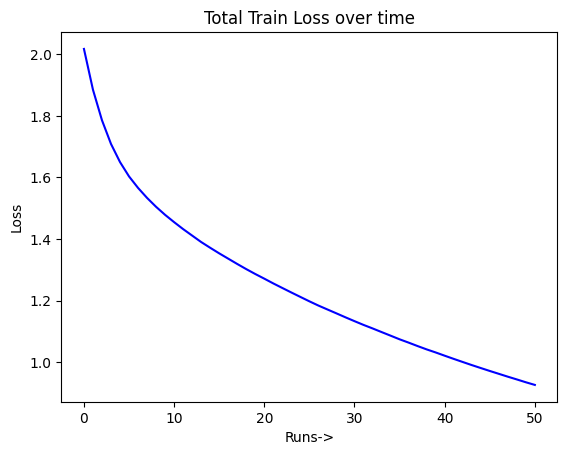

In [ ]:
import matplotlib.pyplot as plt
# Plot the smoothed line
plt.plot(smoothed_loss, color='blue')
plt.ylabel('Loss')
plt.xlabel('Runs->')
plt.title("Total Train Loss over time")
plt.show()

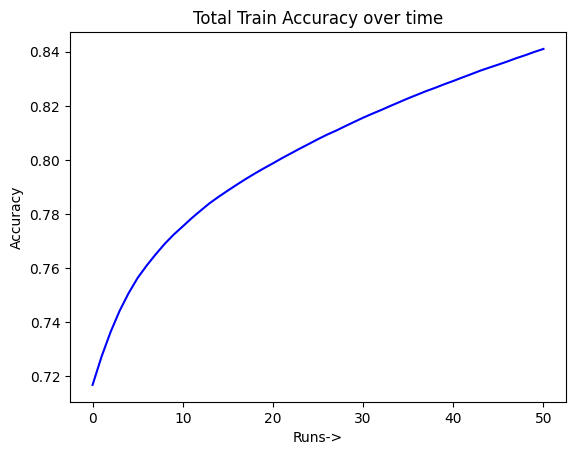

In [ ]:
total = [value for group in all_train_accuracy for value in group]

# Apply a rolling average with a window size of 50
smoothed_loss = np.convolve(total, np.ones(50) / 50, mode='valid')

# Plot the smoothed line
plt.plot(smoothed_loss, color='blue')
plt.ylabel('Accuracy')
plt.xlabel('Runs->')
plt.title("Total Train Accuracy over time")
plt.show()

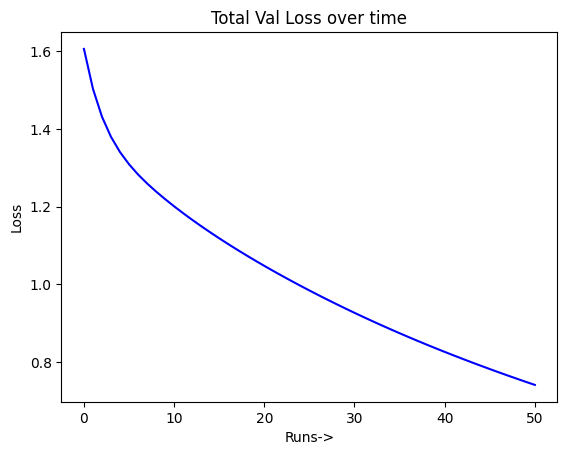

In [ ]:
total = [value for group in all_val_loss for value in group]

# Apply a rolling average with a window size of 50
smoothed_loss = np.convolve(total, np.ones(50) / 50, mode='valid')

# Plot the smoothed line
plt.plot(smoothed_loss, color='blue')
plt.ylabel('Loss')
plt.xlabel('Runs->')
plt.title("Total Val Loss over time")
plt.show()

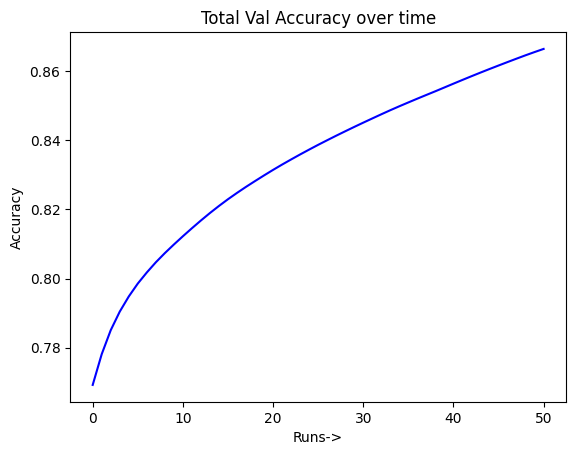

In [ ]:
# Flatten the list
total = [value for group in all_val_accuracy for value in group]

# Apply a rolling average with a window size of 50
smoothed_loss = np.convolve(total, np.ones(50) / 50, mode='valid')

# Plot the smoothed line
plt.plot(smoothed_loss, color='blue')
plt.ylabel('Accuracy')
plt.xlabel('Runs->')
plt.title("Total Val Accuracy over time")
plt.show()

In [ ]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.0 MB/s eta 0:00:00


In [8]:
from transformers import T5TokenizerFast, T5ForConditionalGeneration
import torch.nn as nn
import torch
 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
 
 
def predict(text):
    model = T5ForConditionalGeneration.from_pretrained("best_t5_model", use_safetensors=True)
    tokenizer = T5TokenizerFast.from_pretrained("best_t5_model_tokenizer")
 
    # model = nn.DataParallel(model)
    model = model.to(device)
 
    #split text into words
    texts = text.split(" ")
    texts = [text[i:i + 100] for i in range(0, len(text), 100)]
 
    #tokenize text
    input_ids = []
    attention_mask = []
 
    for text in texts:
        tokenized_text = tokenizer(text, return_tensors="pt", max_length=512, truncation=True, padding=True)
        tokenized_input_ids = tokenized_text["input_ids"]
        tokenized_attention_mask = tokenized_text["attention_mask"]
 
        input_ids.append(tokenized_input_ids)
        attention_mask.append(tokenized_attention_mask)
 
    #predict
    # pass the input ids as a batch
    input_ids = torch.cat(input_ids, dim=0)
    attention_mask = torch.cat(attention_mask, dim=0)
 
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
 
    outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask)
 
    #decode
    decoded_outputs = tokenizer.batch_decode(outputs, skip_special_tokens=True)
 
    return decoded_outputs

In [10]:
print(predict("In certain conditions, typically classrooms, a single direction of escape (a dead end condition)"))

['Requirement Requirement Requirement Requirement Require']


In [20]:
!zip -r /content/best_model.zip /content/best_t5_model

  adding: content/best_t5_model/ (stored 0%)
  adding: content/best_t5_model/config.json (deflated 63%)
  adding: content/best_t5_model/generation_config.json (deflated 27%)
  adding: content/best_t5_model/model.safetensors (deflated 12%)


In [21]:
!zip -r /content/best_model_tokenizer.zip /content/best_t5_model_tokenizer

  adding: content/best_t5_model_tokenizer/ (stored 0%)
  adding: content/best_t5_model_tokenizer/special_tokens_map.json (deflated 86%)
  adding: content/best_t5_model_tokenizer/tokenizer_config.json (deflated 95%)
  adding: content/best_t5_model_tokenizer/tokenizer.json (deflated 74%)


In [22]:
#download the zips

from google.colab import files
files.download("/content/best_model.zip")
files.download("/content/best_model_tokenizer.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>